In [4]:
import zipfile

!curl -O https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  104M  100  104M    0     0  14.7M      0  0:00:07  0:00:07 --:--:-- 19.6M


In [5]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspect the data (begin one with it )

A very crusial step at the beginning of any machine learning project is becoming one with the data
And for a computer version project... this usually means visualizing many sample of your data

In [1]:
!ls pizza_steak

test  train


In [80]:
import os


print(os.listdir())
for dirpath, dirnames ,filenames in os.walk("pizza_steak"):

    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' . ")

['pizza_steak.zip', 'steak.jpeg', 'pizza_steak', 'computer_vision.ipynb', '.ipynb_checkpoints']
There are 2 directories and 0 images in 'pizza_steak' . 
There are 2 directories and 0 images in 'pizza_steak/test' . 
There are 0 directories and 250 images in 'pizza_steak/test/steak' . 
There are 1 directories and 250 images in 'pizza_steak/test/pizza' . 
There are 0 directories and 1 images in 'pizza_steak/test/pizza/.ipynb_checkpoints' . 
There are 2 directories and 0 images in 'pizza_steak/train' . 
There are 0 directories and 750 images in 'pizza_steak/train/steak' . 
There are 0 directories and 750 images in 'pizza_steak/train/pizza' . 


In [4]:
!ls -la pizza_steak

total 0
drwxr-xr-x  4 kkt  staff  128 Apr 24 18:19 .
drwxr-xr-x@ 6 kkt  staff  192 May  6 17:54 ..
drwxr-xr-x  4 kkt  staff  128 Apr 24 18:19 test
drwxr-xr-x  4 kkt  staff  128 Apr 24 18:19 train


In [5]:
# Another ways to find out how many images are in a file

num_steak_image_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_image_train

750

In [94]:
# Get the class name programmatically

import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
#class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class name from the subdirectory

items = data_dir.glob('*');

names = [item.name for item in items]  
#print(names)
class_name = np.array(sorted(names))
print(class_names)

['pizza' 'steak']


In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random


def view_random_image(target_dir, target_class):

    target_folder = target_dir + target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    print(random_image)

    # Read in the image and plot is using matplotlib

    imge =  mpimg.imread(target_folder + "/" + random_image[0])

    plt.imshow(imge)
    plt.title(target_class)

    plt.axis("off")

    print(f"Image shape: {imge.shape}")

    return imge

['952437.jpg']
Image shape: (384, 512, 3)


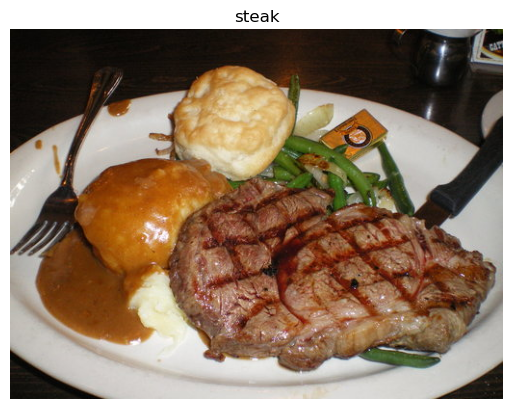

In [7]:
img = view_random_image(target_dir="pizza_steak/train/", target_class="steak")

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

 # setup path to our data dictionary
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

 # preprocess data (get all of the pixel value between 0 and 1 , also called data normalization/scaling)
traindata_gen = ImageDataGenerator(rescale=1./255)
testdata_gen = ImageDataGenerator(rescale=1./255)

# Import data from directory and turn it into batches
train_data =  traindata_gen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224,224),
    seed=42,
    shuffle=True, # important for learning)
    class_mode="binary")
valida_data = testdata_gen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224,224),
    seed=42,
    shuffle=False,   # Important: don't shuffle validation data
    class_mode="binary")

# Build a CNN model (same as the Tiny VGG on the CNN explainer website )

model_1 = tf.keras.Sequential([
    Input(shape=(224, 224, 3)),  # Proper input layer instead of input_shape in Conv2D
    layers.Conv2D(10, 3, activation="relu"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.MaxPool2D(pool_size=2,padding="valid"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.Conv2D(10, 3, activation="relu"),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid")
])


# Compile our 
model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
   metrics=[
        "binary_accuracy",
        tf.keras.metrics.FalseNegatives(),
    ],
)



# fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valida_data,
    validation_steps=len(valida_data)
    
)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2025-05-06 17:59:52.756679: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-05-06 17:59:52.756704: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2025-05-06 17:59:52.756712: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2025-05-06 17:59:52.756728: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-05-06 17:59:52.756745: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/kkt/miniconda3/envs/tf_vison_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `sup

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - binary_accuracy: 0.5678 - false_negatives: 209.4792 - loss: 0.6683 - val_binary_accuracy: 0.6820 - val_false_negatives: 6.0000 - val_loss: 0.5884
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - binary_accuracy: 0.7778 - false_negatives: 81.4792 - loss: 0.4811 - val_binary_accuracy: 0.7680 - val_false_negatives: 8.0000 - val_loss: 0.4710
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - binary_accuracy: 0.8174 - false_negatives: 68.1250 - loss: 0.4207 - val_binary_accuracy: 0.8600 - val_false_negatives: 41.0000 - val_loss: 0.3361
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - binary_accuracy: 0.8585 - false_negatives: 62.4375 - loss: 0.3431 - val_binary_accuracy: 0.8720 - val_false_negatives: 32.0000 - val_loss: 0.3394
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - binary_accuracy: 0.8968 - false_negatives: 47.8542 - loss: 0.3028 - val_binary_accuracy: 0.8580 - val_false_negatives: 37.0000 - val_loss: 0.3225


In [10]:
 len(train_data) # 1500 / (batch size =32) = 42

47

In [11]:
# Get a model summary

model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Using the same model as before

 Let's replicate the model we've built in previous section to see if it works with our image data

 The model we're building is from the [Tensor flow playground](
 https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.69847&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [12]:
# set the seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow playground model

model_2 = tf.keras.Sequential([
    Input(shape=(224,224,3)),
    layers.Flatten(),
    layers.Dense(4,activation="relu"),
    layers.Dense(4,activation="relu"),
    layers.Dense(1,activation="sigmoid")
    
])

# Complie the model

model_2.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_2 = model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valida_data,
    validation_steps=len(valida_data)
)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.4942 - loss: 99.1203 - val_accuracy: 0.5000 - val_loss: 168.7054
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.5082 - loss: 158.3086 - val_accuracy: 0.5000 - val_loss: 146.2381
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5142 - loss: 134.8530 - val_accuracy: 0.5000 - val_loss: 122.8844
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4976 - loss: 115.7606 - val_accuracy: 0.5000 - val_loss: 100.1008
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5216 - loss: 89.3626 - val_accuracy: 0.5000 - val_loss: 78.0983


In [13]:
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

In [14]:
# set the seed
tf.random.set_seed(42)

# Create a model to replicate the Tensorflow playground model

model_3 = tf.keras.Sequential([
    Input(shape=(224,224,3)),
    layers.Flatten(),
    layers.Dense(100,activation="relu"),
    layers.Dense(100,activation="relu"),
    layers.Dense(100,activation="relu"),
    layers.Dense(1,activation="sigmoid")
]
)


# Complie the model

model_3.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

# fit the model
history_3 = model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valida_data,
    validation_steps=len(valida_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.4669 - loss: 97.1313 - val_accuracy: 0.6320 - val_loss: 4.8787
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5362 - loss: 7.9774 - val_accuracy: 0.4320 - val_loss: 9.0817
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.5140 - loss: 8.0606 - val_accuracy: 0.7340 - val_loss: 3.7423
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6821 - loss: 4.7294 - val_accuracy: 0.7320 - val_loss: 3.6431
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6783 - loss: 5.5141 - val_accuracy: 0.7380 - val_loss: 2.3155


# Binary Classification: Let's break it down

1. Become one with data (visualize,visualize, visualize)
2. Preprocess the data (prepared it for our model,the main step here was scaling/normalizing)
3. Created a model (start with a baseline)
4. Fit a model
5. Evaluate a model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied(experiment,experiment,experiment)

['3223400.jpg']
Image shape: (512, 512, 3)
['1678284.jpg']
Image shape: (512, 384, 3)


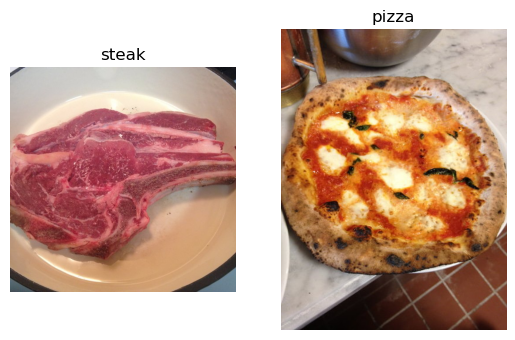

In [15]:
# visualize data
plt.figure()
plt.subplot(1,2,1)
#pizza_steak/train/", target_class="steak"
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

# Our next step is to turn our data into batches
A batch is a small subset of data.Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.
It does this for couple of resons:
 1. 10,000 images (or more ) might not fit into the memory of your processor (GPU)
 2. Trying to learn the pattern in 10,000 images in one hit could result in the model not being to learn well .
why 32. 32 is good for health (by Yann LeCun AI researcher expect ) 

In [16]:
# Create train and test data generator .Then rescale the data

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [17]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(
    target_size=(224,224),
    directory=train_dir,
    batch_size=32,
    class_mode="binary",
    shuffle=True, # important for learning)
)

test_data = train_datagen.flow_from_directory(
    target_size=(224,224),
    directory=test_dir,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [18]:
# Get a sample of training data batch

images, labels = next(train_data)  # get the next batch/labels in train data
len(images), len(labels)

(32, 32)

In [19]:
# How many batches are there
len(train_data)

47

In [20]:
1500 /32

46.875

# Create a CNN model (start with a baseline)
A baseline is a relatively simple model or exisiting result that you setup when beginnin a machine learning experiment and then as you keep experimenting , you try to beat the baseline.

In [21]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Activation,Input

In [22]:
# Create the model (this will be our baseline , a layer convolutional neural network)
model_4 = Sequential ([
    Conv2D(filters=10, # filter is the number of sliding window going across an input(higher = more coplex model)
            kernel_size=3, # the size of the sliding window going across an input
          strides=1, # the size of the step the sliding window takes across an input
            padding="valid", # if "same", output shape is same as input shape, if "valid " output shape get compressed
           input_shape=(224,224,3), # input layer (especially input shape)
           activation="relu"
          ),
    Conv2D(filters=10,kernel_size=3,activation="relu"),
    Conv2D(filters=10,kernel_size=3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid") # Output layer (working with binary classification)
])

/Users/kkt/miniconda3/envs/tf_vison_env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# compile the model

model_4.compile(optimizer=Adam(),
                loss="binary_crossentropy",
                metrics=["accuracy"]
               )

In [24]:
model_4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 218, 218, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 475240)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │       475,241 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 477,341 (1.82 MB)

 Trainable params: 477,341 (1.82 MB)

 Non-trainable params: 0 (0.00 B)

### 4. Fit the model

In [25]:
# Check the length of training and test data generator

len(train_data), len(test_data)

(47, 16)

In [26]:
# Fit the model 

history_4 = model_4.fit(
    train_data, # this is a combination of lables and sample data
    epochs=5, # e pop
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=(len(test_data))
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6222 - loss: 1.0394 - val_accuracy: 0.8060 - val_loss: 0.3996
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8221 - loss: 0.4145 - val_accuracy: 0.8500 - val_loss: 0.3685
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8830 - loss: 0.3051 - val_accuracy: 0.8500 - val_loss: 0.3572
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9688 - loss: 0.1249 - val_accuracy: 0.8400 - val_loss: 0.3765
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9964 - loss: 0.0391 - val_accuracy: 0.8400 - val_loss: 0.4101


In [21]:
model_1.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - binary_accuracy: 0.8780 - false_negatives: 11.8235 - loss: 0.2927


[0.2954149842262268, 0.8799999952316284, 32.0]

In [24]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### 5.Evalution our Model
# It look like our model is learning something, let's evaluate it

In [25]:
import pandas as pd;

<Axes: >

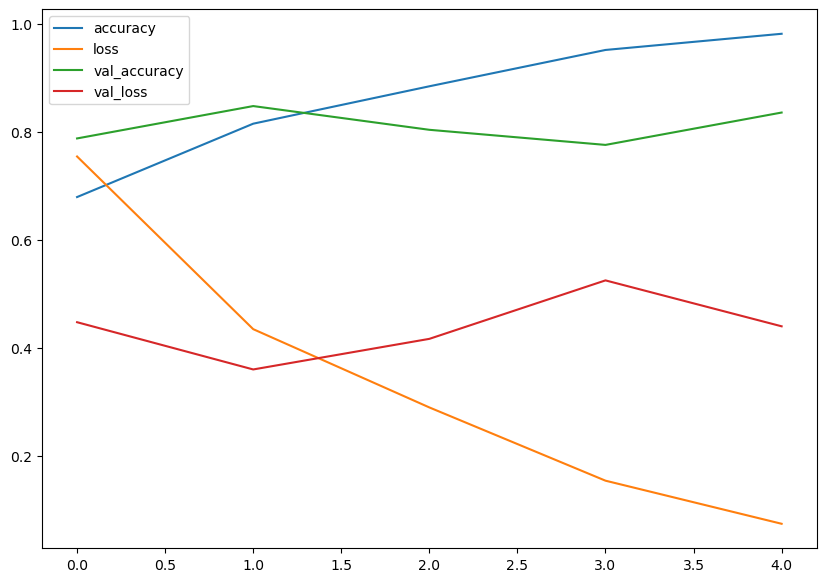

In [26]:
pd.DataFrame(history_4.history).plot(figsize=(10,7))

# **key Notes:** When a model **validations loss start to increase** , it is likely that the model is **overfitting** the training dataset.
# This means, it's learning the patterns in the training dataset *too well* and the model ability to generalize to unseen data will be
# deminished.

In [39]:
# Plot the validation and training curve separately

import matplotlib.pyplot as plt
def plot_loss_curve(history):
    """
    Plots separate loss and accuracy curves for training and validation metrics.
    
    Args:
        history: A Keras History object (returned from model.fit()).
    """
    # training_loss = history.history["loss"]
    training_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"])) # how many epochs did we run for


    plt.figure(figsize=(12, 5))
   ## plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs,training_loss,label="training_loss")
    plt.plot(epochs, val_loss, label="val_loose")
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

   ## plot accuracy
    # plt.figure()
    plt.subplot(1, 2, 2)
    plt.plot(epochs,accuracy,label="accuracy")
    plt.plot(epochs, val_loss, label="val_accuracy")
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    plt.tight_layout()
    # plt.show()
# 

# def plot_loss_curve(history):
#     """
#     Plots separate loss and accuracy curves for training and validation metrics.
    
#     Args:
#         history: A Keras History object (returned from model.fit()).
#     """
#     # Extract metrics
#     training_loss = history.history["loss"]
#     val_loss = history.history["val_loss"]
#     training_accuracy = history.history["accuracy"]
#     val_accuracy = history.history["val_accuracy"]
    
#     epochs = range(1, len(training_loss) + 1)  # Corrected: Generate epoch numbers (1, 2, 3...)

#     # Plot loss
#     plt.figure(figsize=(12, 5))
    
#     plt.subplot(1, 2, 1)
#     plt.plot(epochs, training_loss, label="Training Loss")
#     plt.plot(epochs, val_loss, label="Validation Loss")
#     plt.title("Loss Curve")
#     plt.xlabel("Epochs")
#     plt.ylabel("Loss")
#     plt.legend()

#     # Plot accuracy
#     plt.subplot(1, 2, 2)
#     plt.plot(epochs, training_accuracy, label="Training Accuracy")
#     plt.plot(epochs, val_accuracy, label="Validation Accuracy")
#     plt.title("Accuracy Curve")
#     plt.xlabel("Epochs")
#     plt.ylabel("Accuracy")
#     plt.legend()

#     plt.tight_layout()
#     plt.show()

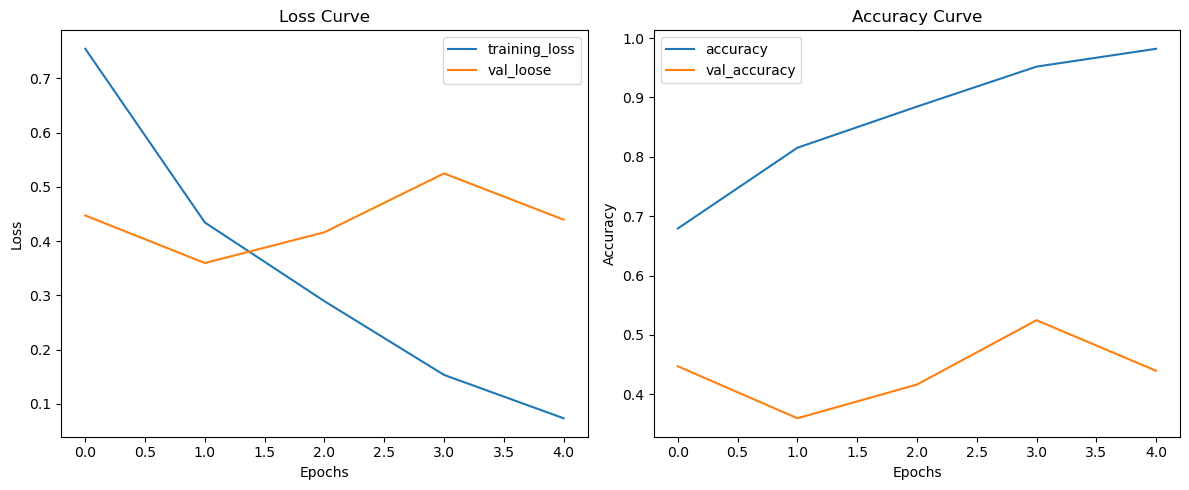

In [86]:
plot_loss_curve(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to introduce overfitting:

* increase the number of conv layers:
* increase the number of conv filters:
* Add another dense layer to the output of our flatterned layer

Reduce overfitting:

* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...
* Reducing overfitting is also known as regularization

In [112]:
# Create a model (this is going to be our baseline)

#Input(shape=(224, 224, 3)),  # Explicit input layer
model_5 = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(pool_size=2, padding="same"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])

In [113]:
# Compile the model
model_5.compile(
    optimizer=Adam(),
    metrics=["accuracy"],
    loss="binary_crossentropy"
               )

In [114]:
history_5 = model_5.fit(
    train_data,
    epochs=5,
    validation_data=test_data,
    steps_per_epoch=len(train_data),
    validation_steps=len(test_data)
       
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5956 - loss: 0.6690 - val_accuracy: 0.7740 - val_loss: 0.4709
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.7463 - loss: 0.5001 - val_accuracy: 0.8320 - val_loss: 0.4039
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.8061 - loss: 0.4345 - val_accuracy: 0.8480 - val_loss: 0.3431
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8282 - loss: 0.3792 - val_accuracy: 0.8700 - val_loss: 0.3173
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8331 - loss: 0.3614 - val_accuracy: 0.8560 - val_loss: 0.3488


In [116]:
# Evaluate model
model_5.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.7996 - loss: 0.4296


[0.3488333523273468, 0.8560000061988831]

In [117]:
# Model summary
model_5.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

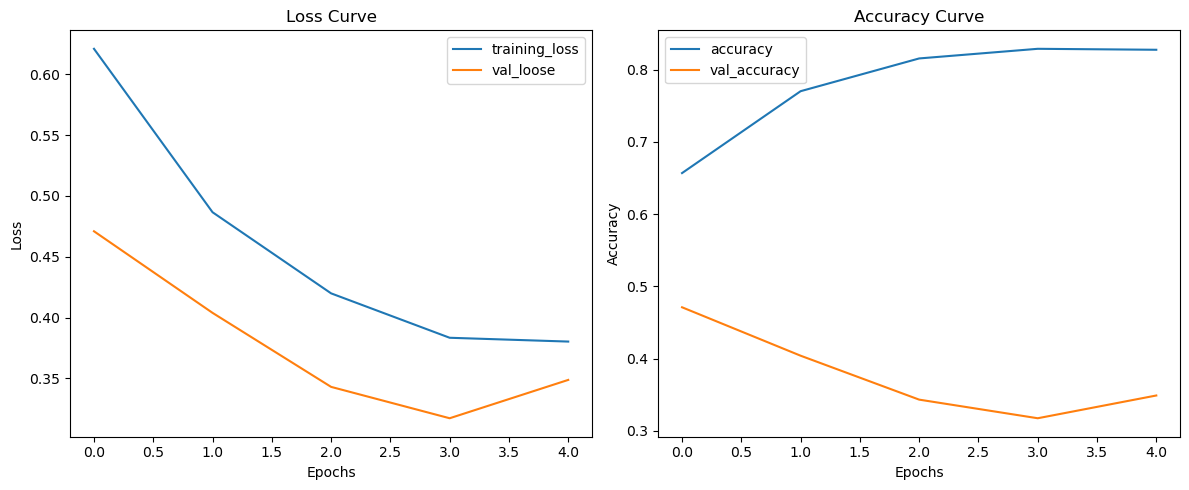

In [118]:
plot_loss_curve(history_5)

## Opening our bags of tricks and finding data augmentation

In [31]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augment =ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2, # how much do you want to rotate an image?
                                            shear_range=0.2, # how much do you want to shear an image ?
                                            zoom_range=0.2,  # zoom in randomly on an image
                                            width_shift_range=0.2, # move your image around on the x-axis
                                            height_shift_range=0.3, # move your image around on the y-axis
                                            horizontal_flip=True # do you want to flip an image
                                           )
# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)
  

## Question: What is Data augmentation?
Data augmentation is the process of altering our training data,leading it to have more diversity and in run allowing our model to learn 
 more generalizable (hopefully) pattern.Altering might mean adjusting the roation of an image, flipping it, cropping it or something similiar

In [32]:
# Import data and augmented from training directory
IMAGE_SIZE = (224,224)

print("Augmented training data")
train_data_agument = train_datagen_augment.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="binary",
    shuffle=False # for demostration purpose only
)

# Created non-augmented train data batches
print("Non Augmented training data ")
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="binary",
    shuffle=False
)

# Created non-augmented test data batches
print ("Non Augmented test data")
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="binary"   
)


Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data 
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


## Data Augmention is usually only performed on the training data.Using `Image Data generator` build in data augmention parameters our images are left as they are in a directories but are modified as they're loaded into the model

In [33]:
# Get sample data batch
images,label = next(train_data)

augmented_images, augmented_label = next(train_data_agument) # note: label aren't augmented ... only data (augmented)

showing image number: 13


(-0.5, 223.5, 223.5, -0.5)

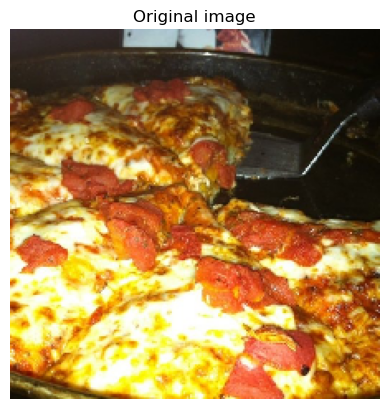

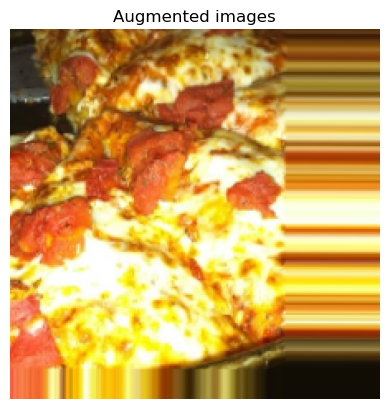

In [34]:
# Show original image and augmented image
import random

random_number = random.randint(0,32) # our batch size are 32..
print(f"showing image number: {random_number}")

plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title(f"Augmented images")
plt.axis(False)


In [35]:
# Create a model

model_6 = Sequential([
    Input(shape=(224,224,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(pool_size=2, padding="same"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation="sigmoid")
])


# Compile a model
model_6.compile(loss="binary_crossentropy",
               optimizer=Adam(),
                metrics=["accuracy"]
               )      

# Fit a model 
history_6 = model_6.fit(
    train_data_agument, # fitting model_6 on augmented training data
    epochs=5,
    steps_per_epoch=len(train_data_agument),
    validation_data=test_data,
    validation_steps=len(test_data)
)

/Users/kkt/miniconda3/envs/tf_vison_env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 169ms/step - accuracy: 0.4250 - loss: 0.7232 - val_accuracy: 0.5000 - val_loss: 0.6822
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 167ms/step - accuracy: 0.5231 - loss: 0.6934 - val_accuracy: 0.5020 - val_loss: 0.6808
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.3893 - loss: 0.7017 - val_accuracy: 0.5000 - val_loss: 0.6780
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.5207 - loss: 0.6940 - val_accuracy: 0.6300 - val_loss: 0.6677
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 158ms/step - accuracy: 0.6198 - loss: 0.6712 - val_accuracy: 0.5520 - val_loss: 0.6822


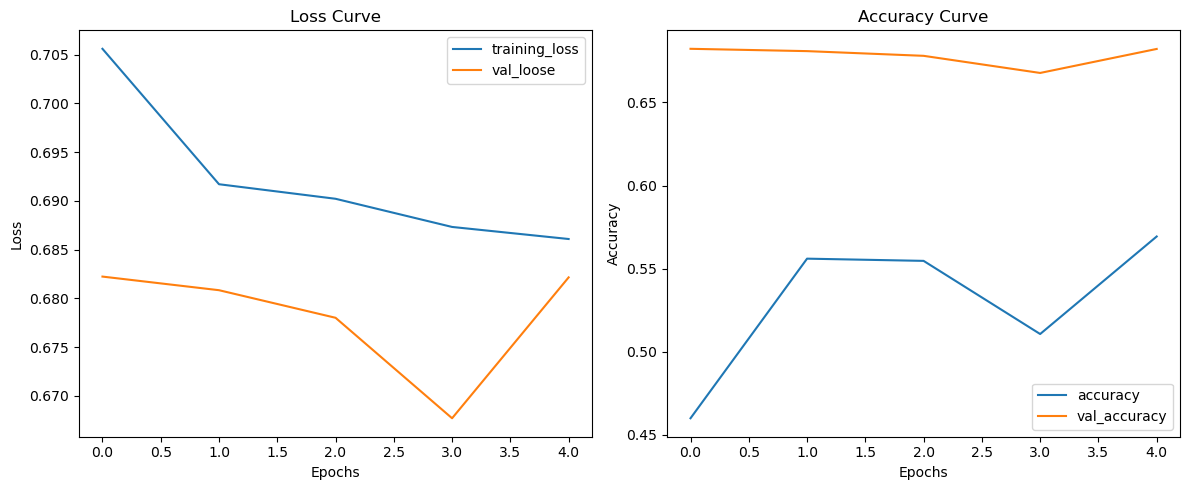

In [40]:
plot_loss_curve(history_6)

In [41]:
# Import data, Agument it and shuffle from training directory
train_data_agument_shuffle = train_datagen_augment.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode="binary",
    shuffle=False # for demostration purpose only
)


Found 1500 images belonging to 2 classes.


In [46]:
# Create a model
model_7 = Sequential([
        Input(shape=(224,224,3)),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(padding="same"),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(),
        Flatten(),
        Dense(1,activation="sigmoid")
])


# compile a model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)


history_7 = model_7.fit(
    train_data_agument_shuffle,
    epochs=5,
    steps_per_epoch=len(train_data_agument_shuffle),
    validation_data=test_data,
    validation_steps=len(test_data)
)


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 170ms/step - accuracy: 0.5755 - loss: 0.7136 - val_accuracy: 0.5060 - val_loss: 0.6733
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.6362 - loss: 0.6831 - val_accuracy: 0.5000 - val_loss: 0.7461
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 163ms/step - accuracy: 0.5616 - loss: 0.6811 - val_accuracy: 0.7800 - val_loss: 0.5586
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.7327 - loss: 0.6015 - val_accuracy: 0.6840 - val_loss: 0.5561
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 160ms/step - accuracy: 0.6801 - loss: 0.6274 - val_accuracy: 0.8160 - val_loss: 0.5120


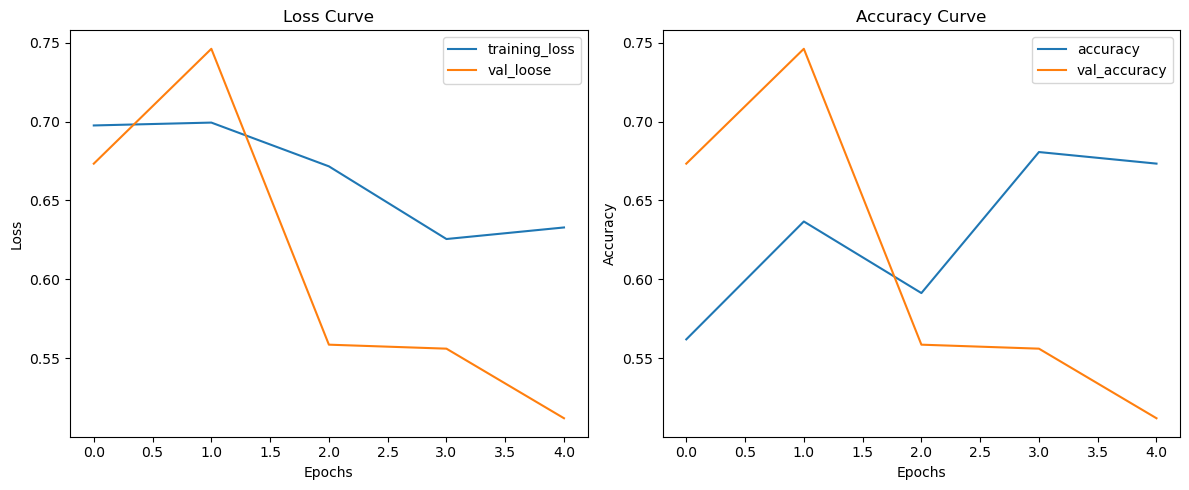

In [47]:
plot_loss_curve(history_7)

# Repeat until satisfied
Since we already beaten our baseline,there are a few things we could try to improve
 * Increase the number of model layers(e.g add more `Conv2d` / `MaxPool2D` layers)
 * Increase the number of filters in each convolution layers (e.g from 10 to 32 or 64)
 * Train for longer (more epochs)
 * Find a ideal learning rate
 * Get more data (give the model more opportunity to learn)
 * User **transfer learning** to levarage what another image model has learn and adjust it for our own useage
 * Recreated the model on CNN website explainer website (same as model_1) and see how it perform on augmented shuffled training data

# Make a prediction with our train model on our owm custom data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1931k  100 1931k    0     0  2078k      0 --:--:-- --:--:-- --:--:-- 2077k


(-0.5, 3023.5, 4031.5, -0.5)

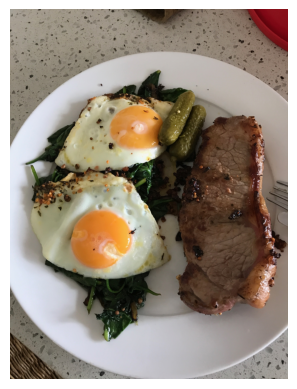

In [66]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!curl -o steak.jpeg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

steak = mpimg.imread("steak.jpeg")
plt.imshow(steak)
plt.axis(False)
# plt.show()


In [56]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

In [57]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 111],
        [142, 121, 100],
        [101,  80,  59],
        ...,
        [164, 155, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  96],
        [138, 118,  94],
        [106,  85,  64],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 126, 102],
        [148, 128, 103],
        [114,  93,  72],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [143, 132, 126]]

In [72]:
# Create a function to import, image and resize it to be able to used with our model

def load_and_prep_image(filename, img_shape=224):
    """
    Read an images from filename,turns it into a tensor and reshape it to
    (img_shape,img_shape,color_channels)
    """

    # Read in the image
    img = tf.io.read_file(filename)
    # Decode read file into tensor
    img = tf.image.decode_image(img,channels=3)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.

    return img

In [73]:
model_7.predict(steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_9_1/Cast:0", shape=(32, 3024, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 3024, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 3024, 3), dtype=uint8)
  • training=False
  • mask=None

In [74]:
# Loadd in and preposs our custom image
steak = load_and_prep_image("steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [75]:
model_7.predict(steak)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(32, 224, 3), dtype=float32). Expected shape (None, 224, 224, 3), but input has incompatible shape (32, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [96]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[0.6998675]], dtype=float32)

In [95]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [98]:
# we can index the predicted class by rouding the prediction probability and indexing it on the class name

pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [99]:
def pre_and_plot(model, file_name,class_names=class_names):
    """
    Imports an image located at filename, make a predictions with model and plots
    the images with the predicted class as the title
    """

    # Import the target images and prepoccess it
    img = load_and_prep_image(file_name)

    # Make a predictions
    pred = model.predict(tf.expand_dims(img,axis=0))

    # Get the predict class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predict class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


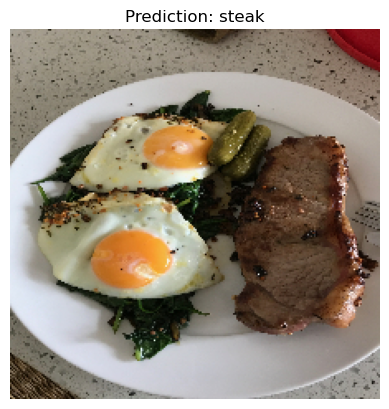

In [100]:
pre_and_plot(model_7, "steak.jpeg")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2807k  100 2807k    0     0  1927k      0  0:00:01  0:00:01 --:--:-- 1928k


(-0.5, 3023.5, 4031.5, -0.5)

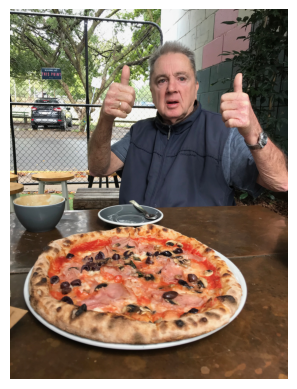

In [103]:
!curl -o 03-pizza-dad.jpeg https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

steak = mpimg.imread("03-pizza-dad.jpeg")
plt.imshow(steak)
plt.axis(False)